<a href="https://colab.research.google.com/github/kokikudo/submit_an_assignment/blob/master/Sprint4_Scratch_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ロジスティック回帰スクラッチ
下記の雛形クラスにコードを書き加える。推定結果のメソッドは2種類（ラベルと確率）作る。

In [ ]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter=5000, lr=1e-3, no_bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    # 問題1　仮定関数--------------------------------------------------------------------
    def _logistic_hypothesis(self, X):
        """
        
        """
        x1 = X
        x0 = np.ones(x1.shape[0]).reshape(-1, 1)

        return np.concatenate([x0, x1], axis=1)

    # 問題2　最急降下法---------------------------------------------------------------------
    def _gradient_descent(self, error, X):
        """
        
        """
        # 正則化項ではない式
        left = np.dot(error.T, X) / len(X)

        # 正則化項(x0=バイアス項の値は0に置換)
        gamma = 0.01  # ガンマ。0.01がオーソドックス。
        right = (gamma / X.shape[0]) * self.theta
        np.put(right, 0, 0)

        # 移動量
        amount = left + right
        # θを更新
        self.theta = self.theta - (self.lr * amount)

    #問題4　目的関数-----------------------------------------------------------------------
    def _loss_function(self, y_true, z, gamma=0.01):
        left1 = (-y_true * np.log(z))
        left2 = ((1 - y_true) * np.log(1 - z))
        left_J = np.sum(left1 - left2) / z.shape[0]
        right_J = ((gamma / z.shape[0]) * 2) * np.sum((self.theta**2))
        #right_J = (gamma/2) * np.mean(self.theta**2)
        np.put(right_J, 0, 0)
        loss = left_J + right_J
        return loss

    #------------------------------------------------------------------------------------------
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # バイアス項有無で分岐
        if self.no_bias is not True:
            X = self._logistic_hypothesis(X)
        else:
            X = X
        np.random.seed(2)
        self.theta = np.random.rand(X.shape[1]).reshape(1, -1)

        for i in range(self.iter):
            # 仮定関数
            z = np.dot(X, self.theta.T)  # (75, 1)
            
            # シグモイト関数で出力
            y_pred = 1 / (1 + np.exp(-z))  # (75, 1)

            # 正解値
            y_true = y  #(75, )
            y_true = y_true.reshape(-1, 1)
            
            # 誤差
            error = y_pred - y_true
            
            # X_validを入力した場合は、X2として読み込む
            if X_val is not None:
                if self.no_bias is not True:
                    X2 = self._logistic_hypothesis(X_val)
                else:
                    X2 = X_val
                z2 = np.dot(X2, self.theta.T)
                y_pred2 = 1 / (1 + np.exp(-z2))
                y_true2 = y_val
                y_true2 = y_true2.reshape(-1, 1)
                error_val = y_pred2 - y_true2
                self.val_loss[i] += self._loss_function(y_true2, y_pred2)

            # 目的関数を算術し記録する
            loss = self._loss_function(y_true, y_pred)
            self.loss[i] += loss

            # 最急降下法
            self._gradient_descent(error, X)

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print('n_iter:', i, 'loss:', self.loss[i], 'theta:', self.theta)

    def predict(self, X, threshold=0.5):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        proba = self.predict_proba(X)
        threshold = threshold

        predict = proba >= threshold
        predict = predict.astype(int).ravel()
        return predict

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.no_bias is not True:
            z = np.dot(self._logistic_hypothesis(X), self.theta.T)
        else:
            z = np.dot(X, self.theta.T)
        s = 1 / (1 + np.exp(-z))
        return s

In [ ]:
import numpy as np
import warnings
warnings.simplefilter('ignore')

## 【問題1】仮定関数

In [ ]:
# 線形回帰の仮定関数zを定義
x = np.arange(10)

x1 = x.reshape(-1, 1)
x0 = np.ones(x1.shape[0]).reshape(-1, 1)

X = np.concatenate([x0, x1], axis=1)
theta = np.random.random(X.shape[1]).reshape(1, -1)
print('X:', X.shape)
print('theta:', theta.shape)

z = np.dot(X, theta.T)
print(z)

X: (10, 2)
theta: (1, 2)
[[0.38456209]
 [0.58020815]
 [0.77585421]
 [0.97150026]
 [1.16714632]
 [1.36279238]
 [1.55843844]
 [1.7540845 ]
 [1.94973056]
 [2.14537662]]


In [ ]:
#シグモイド関数
def sigmoid(z):
    """
    
    """
    g = 1 / (1 + np.exp(-z))
    return g

In [ ]:
y_pred = sigmoid(z)
y_pred = y_pred.reshape(1, -1)
print(y_pred)

[[0.59497295 0.6411153  0.68478591 0.72541843 0.76262881 0.79621316
  0.82612917 0.85246724 0.87541726 0.89523595]]


とりあえずエラーは起きないためクラスに加える。

## 【問題2】最急降下法
最急降下法により学習させパラメータを更新するメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにする。

In [ ]:
print('現在のtheta:\n', theta)

# 正解値
y_true = np.array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

# 誤差
error = y_pred - y_true
print('error.shape', error.shape)
# 正則化項ではない式
left = np.dot(error, X) / len(X)
print('left.shape', left.shape)

# 正則化項(x0=バイアス項の値は0に置換)
gamma = 0.01     # ガンマ。0.01がオーソドックス。
right = (gamma / X.shape[0]) * theta
np.put(right, 0, 0)

# 移動量
amount = left + right

# 学習率
alpha = 1e-2

# θを更新
theta = theta - (alpha * amount)

print('各要素の確率予測 y_pred:', y_pred.shape, '\n',y_pred)
print('正解値y_true:', y_true.shape, '\n', y_true)
print('誤差error:\n', error)
print('正則化項right:\n', right)
print('更新後のtheta:\n', theta)

現在のtheta:
 [[0.38456209 0.19564606]]
error.shape (1, 10)
left.shape (1, 2)
各要素の確率予測 y_pred: (1, 10) 
 [[0.59497295 0.6411153  0.68478591 0.72541843 0.76262881 0.79621316
  0.82612917 0.85246724 0.87541726 0.89523595]]
正解値y_true: (10,) 
 [1 1 1 0 1 0 0 1 1 0]
誤差error:
 [[-0.40502705 -0.3588847  -0.31521409  0.72541843 -0.23737119  0.79621316
   0.82612917 -0.14753276 -0.12458274  0.89523595]]
正則化項right:
 [[0.         0.00019565]]
更新後のtheta:
 [[0.3829077  0.18044107]]


とりあえず動いたのでクラスに入れる。

## 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。


仮定関数 $h_θ(x)$
 の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。



In [ ]:
# 閾値
threshold = 0.7
print('予測確率y_pred:\n', y_pred)

# 閾値を条件にBoolに変換
ttt = y_pred >= threshold
print('閾値を条件にしてBool値に変換：', ttt)

# Bool値をintに変換
ttt = ttt.astype(int)
print('int形に変換:', ttt)

予測確率y_pred:
 [[0.59497295 0.6411153  0.68478591 0.72541843 0.76262881 0.79621316
  0.82612917 0.85246724 0.87541726 0.89523595]]
閾値を条件にしてBool値に変換： [[False False False  True  True  True  True  True  True  True]]
int形に変換: [[0 0 0 1 1 1 1 1 1 1]]


うまく確率を閾値で0と1に区分けできた。クラスに加える。

## 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


なお、この数式には正則化項が含まれています。
$$
J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[−y^{(i)} log(h_θ(x^{(i)})) − (1−y^{(i)}) log(1−h_θ(x^{(i)}))] +
\frac{λ}{2m}\sum_{j=1}^n
θ^2_j.\\
$$

In [ ]:
left1 = (- y_true * np.log(y_pred))
left2 = -((1 - y_true) * np.log(1 - y_pred))
left_J = np.mean(left1 + left2)

gamma = 0.01     # ガンマ。0.01がオーソドックス。
right_J = (gamma / (X.shape[0])*2) * np.mean((theta**2))
#np.put(right, 0, 0) バイアスを0に置換は不要？

loss = left_J + right_J
loss

0.8796559896415025

## 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [ ]:
import sklearn
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
iris = load_iris()

In [ ]:
df = pd.DataFrame(iris.data, columns=["sepal length", "sepal width", "petal length", "petal width"])
df["target"] = iris.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
select_df = df.query('target != 0')
select_df

,sepal length,sepal width,petal length,petal width,target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# versicolorを0、virginicaを1に変更
target_index = ["versicolor", "virginica"]

select_df.loc[select_df['target'] == 1, 'target'] = 0
select_df.loc[select_df['target'] == 2, 'target'] = 1

In [ ]:
select_df

,sepal length,sepal width,petal length,petal width,target
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [ ]:
X = select_df[['sepal length', 'sepal width', 'petal length', 'petal width']].values
y = select_df['target'].values

In [ ]:
# データを分割し標準化
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

print('X_train_std.shape:', X_train_std.shape)
print('X_valid_std.shape:', X_valid_std.shape)
print('y_train.shape:', y_train.shape)
print('y_valid.shape:', y_valid.shape)

X_train_std.shape: (75, 4)
X_valid_std.shape: (25, 4)
y_train.shape: (75,)
y_valid.shape: (25,)


In [ ]:
# 既存のライブラリで試す
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

sklearn_reg = LogisticRegression()
sklearn_reg.fit(X_train_std, y_train)
sklearn_y_pred = sklearn_reg.predict(X_valid_std)
print('sklearnのロジスティック回帰モデルで学習した場合')

print('推定結果=', sklearn_y_pred)
print('confusion matrix = \n', confusion_matrix(y_true=y_valid, y_pred=sklearn_y_pred))
print('accuracy = ', accuracy_score(y_true=y_valid, y_pred=sklearn_y_pred))
print('precision = ', precision_score(y_true=y_valid, y_pred=sklearn_y_pred))
print('recall = ', recall_score(y_true=y_valid, y_pred=sklearn_y_pred))
print('f1 score = ', f1_score(y_true=y_valid, y_pred=sklearn_y_pred))


sklearnのロジスティック回帰モデルで学習した場合
推定結果= [0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1]
confusion matrix = 
 [[15  1]
 [ 2  7]]
accuracy =  0.88
precision =  0.875
recall =  0.7777777777777778
f1 score =  0.823529411764706


In [ ]:
# スクラッチの場合
scrathc_reg1 = ScratchLogisticRegression(num_iter=10000, lr=1e-2)

scrathc_reg1.fit(X_train_std, y_train, X_valid_std, y_valid)

In [ ]:
scrathc_y_pred1 = scrathc_reg1.predict(X_valid_std, threshold=0.5)

print('スクラッチで学習した場合')

print('推定結果=', scrathc_y_pred1)
print('confusion matrix = \n', confusion_matrix(y_true=y_valid, y_pred=scrathc_y_pred1))
print('accuracy = ', accuracy_score(y_true=y_valid, y_pred=scrathc_y_pred1))
print('precision = ', precision_score(y_true=y_valid, y_pred=scrathc_y_pred1))
print('recall = ', recall_score(y_true=y_valid, y_pred=scrathc_y_pred1))
print('f1 score = ', f1_score(y_true=y_valid, y_pred=scrathc_y_pred1))

スクラッチで学習した場合
推定結果= [0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1]
confusion matrix = 
 [[15  1]
 [ 2  7]]
accuracy =  0.88
precision =  0.875
recall =  0.7777777777777778
f1 score =  0.823529411764706


acc_score最高値 0.92
その時の閾値 0.5370000000000001


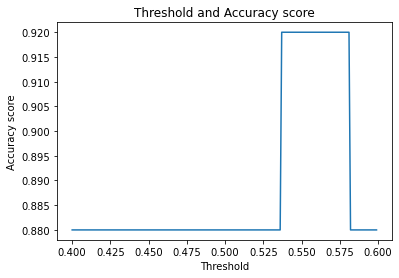

In [ ]:
# 閾値を変更し正解値が上がるか検証
Accuracy_list = []
Threshold_list = []
for i in np.arange(0.40, 0.60, 0.001):
    scrathc_y_pred = scrathc_reg1.predict(X_valid_std, threshold=i)
    Accuracy_list.append(accuracy_score(y_true=y_valid, y_pred=scrathc_y_pred))
    Threshold_list.append(i)
    
max_acc = max(Accuracy_list)
print('acc_score最高値', max_acc)
print('その時の閾値', Threshold_list[Accuracy_list.index(max_acc)])

import matplotlib.pyplot as plt

plt.title('Threshold and Accuracy score')
plt.xlabel('Threshold')
plt.ylabel('Accuracy score')
plt.plot(Threshold_list, Accuracy_list);

なぜか結果が変わることがある（fitする時のθを乱数生成にしてるから？）。

In [ ]:
# 学習率の値を少なくした。　1e-3 →　1e-4
scrathc_reg2 = ScratchLogisticRegression(num_iter=5000, lr=1e-4)

scrathc_reg2.fit(X_train_std, y_train, X_valid_std, y_valid)

In [ ]:
scrathc_y_pred2 = scrathc_reg2.predict(X_valid_std, threshold=0.5)

print('スクラッチで学習した場合')

print('推定結果=', scrathc_y_pred2)
print('confusion matrix = \n',
      confusion_matrix(y_true=y_valid, y_pred=scrathc_y_pred2))
print('accuracy = ', accuracy_score(y_true=y_valid, y_pred=scrathc_y_pred2))
print('precision = ', precision_score(y_true=y_valid, y_pred=scrathc_y_pred2))
print('recall = ', recall_score(y_true=y_valid, y_pred=scrathc_y_pred2))
print('f1 score = ', f1_score(y_true=y_valid, y_pred=scrathc_y_pred2))

スクラッチで学習した場合
推定結果= [1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1]
confusion matrix = 
 [[12  4]
 [ 2  7]]
accuracy =  0.76
precision =  0.6363636363636364
recall =  0.7777777777777778
f1 score =  0.7000000000000001


こりゃひでぇや

In [ ]:
# 条件を戻し、閾値を再設定
scrathc_reg3 = ScratchLogisticRegression(num_iter=10000, lr=1e-2)

scrathc_reg3.fit(X_train_std, y_train, X_valid_std, y_valid)

In [ ]:
scrathc_y_pred3 = scrathc_reg3.predict(X_valid_std, threshold=0.537)
print('スクラッチで学習した場合')

print('推定結果=', scrathc_y_pred3)
print('正解=', y_valid)
print('confusion matrix = \n',
      confusion_matrix(y_true=y_valid, y_pred=scrathc_y_pred3))
print('accuracy = ', accuracy_score(y_true=y_valid, y_pred=scrathc_y_pred3))
print('precision = ', precision_score(y_true=y_valid, y_pred=scrathc_y_pred3))
print('recall = ', recall_score(y_true=y_valid, y_pred=scrathc_y_pred3))
print('f1 score = ', f1_score(y_true=y_valid, y_pred=scrathc_y_pred3))

スクラッチで学習した場合
推定結果= [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1]
正解= [1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1]
confusion matrix = 
 [[16  0]
 [ 2  7]]
accuracy =  0.92
precision =  1.0
recall =  0.7777777777777778
f1 score =  0.8750000000000001


学習率と勾配回数からどのように結果が変わったのか、うまく把握できない。

## 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

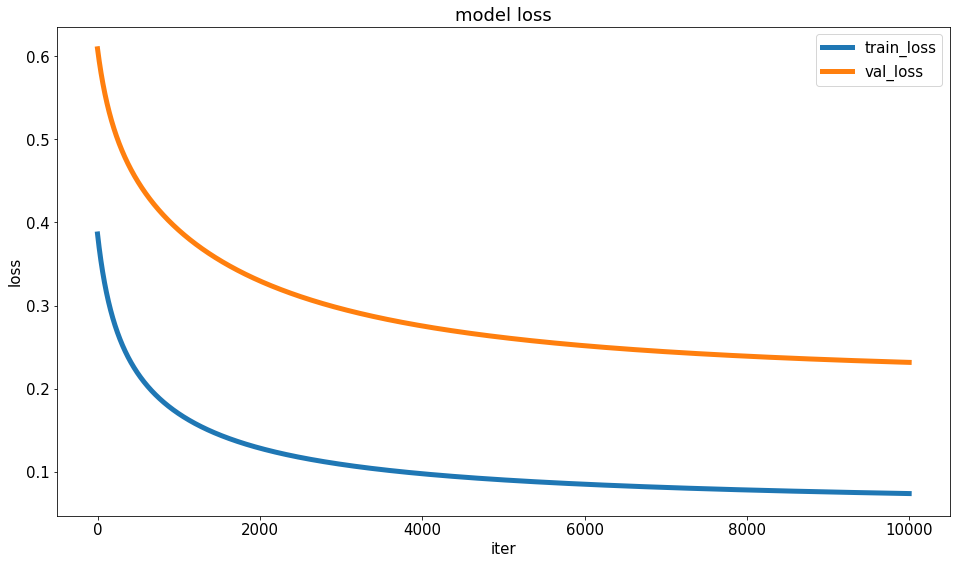

In [ ]:
fig = plt.figure(figsize=(16, 9))
plt.rcParams["font.size"] = 15

plt.title('model loss')
plt.xlabel('iter')
plt.ylabel('loss')
plt.plot(scrathc_reg3.loss, label='train_loss', linewidth=5.0)
plt.plot(scrathc_reg3.val_loss, label='val_loss', linewidth=5.0)
plt.legend();

大きく離れている。学習率や勾配回数をいじっても改善しなかった。

## 【問題7】決定領域の可視化
決定領域を可視化してください。

4つの特徴量の決定領域の可視化は不可能なので、2つの組み合わせからそれぞれ2Dで可視化する。

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['green', 'blue']
    contourf_color = ['pink', 'skyblue']
    Color = numpy.array([.5, .6])
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh, threshold=0.537).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, c=color.reshape(1,-1), label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


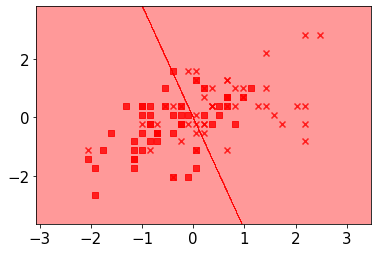

In [ ]:
# 2つの特徴量に絞って再度学習
feature_list = ["sepal length", "sepal width", "petal length", "petal width"]
target_index = ["versicolor", "virginica"]

new_scrathc_reg = ScratchLogisticRegression(num_iter=10000, lr=1e-2)
select_X = select_df[feature_list[0:2]].values
select_y = select_df['target'].values
scaler = StandardScaler()
scaler.fit(select_X)
X_data = scaler.transform(select_X)

X_train_std,  X_valid_std, y_train, y_valid = train_test_split(X_data,
                                                              select_y,
                                                              random_state=2)

new_scrathc_reg.fit(X_train_std, y_train)

plot_decision_regions(X_data, select_y, new_scrathc_reg)

なぜかすべて赤くなった。警告文を見る限り、color設定をいじる必要があるみたいだが、ネットで調べたが解決できなかった。

## 【問題8】（アドバンス課題）重みの保存
検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやNumPyのnp.savezを利用します。

In [ ]:
np.save('Sprint4_learned_theta', scrathc_reg3.theta)

In [ ]:
# 確認のため呼び出し
load_theta = np.load("Sprint4_learned_theta.npy")
print(load_theta)

[[ 0.58066382  0.11138487 -0.62413464  2.6856488   3.43235388]]


## 感想
特徴量を4つ全て学習したので、決定領域の可視化にすごく悩んだ。最初から2つに絞っていれば簡単にできたかもしれないと少し後悔した。また、学習曲線のプロットで、検証データと訓練データで縦軸が大きくずれている原因がわからなかった。そもそも、検証データを学習させる意義をよく理解していなかったため、時間がある時に調べようと思った。